## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 12:13:24--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 13.234.176.102
Connecting to github.com (github.com)|13.234.176.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 12:13:24--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 12:13:25 (28.2 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 12:13:25--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (gi

In [2]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"
  X=np.load(path_X)
  y=np.load(path_y)
  # Write your code here ----------

  # -------------------------------

  return X, y

In [3]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  # -------------------------------
  D = X.shape[1]
  out_shape = 1
  W = np.random.randn(D, out_shape)

  return W

In [4]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  
  # -------------------------------
  m = y.shape[0]
  error = np.sum((y-y_pred)**2)/(2*m)
  return error

In [5]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  
  # -------------------------------
  W = np.linalg.inv(X.T@X)@X.T@y

  return W

In [6]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  
  # -------------------------------
  j=[]
  m = y.shape[0]
  theta = get_linear_model(X,y)
  for i in range(epochs):
    yp = X@theta
    j.append(MSE(y,yp))
    theta-=lr*(np.sum((yp-y)*X))/m

  error_hist = j
  W = theta
  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

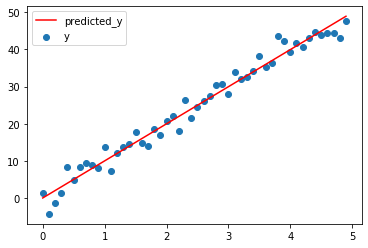

2.7450299103219113


In [7]:
# Write your code here ----------
  
# -------------------------------

X,y = load_data_LR()
w = train_by_algebra(X,y)
yp = X@w

plt.scatter(X,y,label='y')
plt.plot(X,yp,label='predicted_y', color='red')
plt.legend(loc=0)
plt.show()

print(MSE(y,yp))

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

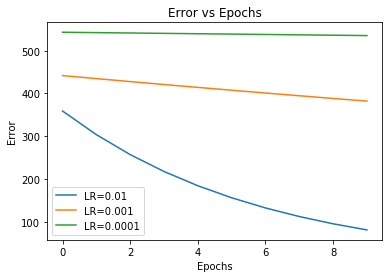

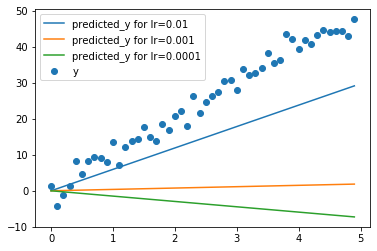

In [8]:
# Write your code here ----------
  
# -------------------------------
w1,j1 = train_by_GD(X,y,10,lr=0.01)
w2,j2 = train_by_GD(X,y,10,0.001)
w3,j3 = train_by_GD(X,y,10,0.0001)

yp1 = X@w1
yp2 = X@w2
yp3 = X@w3

ep = range(10)
plt.plot(ep,j1,label = 'LR=0.01')
plt.plot(ep,j2,label='LR=0.001')
plt.plot(ep,j3,label='LR=0.0001')
plt.title("Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(loc=0)
plt.show()

plt.scatter(X,y,label='y')
plt.plot(X,yp1,label='predicted_y for lr=0.01',)
plt.plot(X,yp2,label='predicted_y for lr=0.001')
plt.plot(X,yp3,label='predicted_y for lr=0.0001')
plt.legend(loc=0)
plt.show()

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [11]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------

  # -------------------------------
  data = tf.keras.datasets.cifar10
  (x_train,y_train),(x_test,y_test) = data.load_data()
  return x_train, y_train, x_test, y_test

In [12]:
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
# plt.imshow(x_train[0])
# plt.imshow(x_train[1000])
print(x_train.shape)

(50000, 32, 32, 3)


### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [13]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  # -------------------------------
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(7200,activation='relu'),
    tf.keras.layers.Dense(2304,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_class,activation='softmax')
  ])

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [19]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  # -------------------------------
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_class,activation='softmax')
  ])
  # model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dense(64,activation='relu'))
  # model.add(tf.keras.layers.Dense(num_class, activation = 'softmax'))

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 39s 389ms/step - loss: 1624.9681 - accuracy: 0.1009 - val_loss: 2.3049 - val_accuracy: 0.1001
Epoch 2/10
98/98 [==============================] - 39s 401ms/step - loss: 2.3062 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 38s 391ms/step - loss: 21.5469 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 38s 388ms/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 38s 388ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 38s 393ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 39s 403ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.

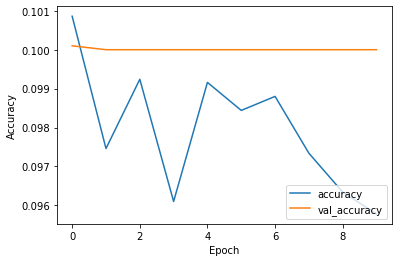

In [15]:
# Write your code here ----------

# -------------------------------
model = build_fc_model()
model.compile(optimizer= 'rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/20
98/98 [==============================] - 13s 123ms/step - loss: 3.5573 - accuracy: 0.1969 - val_loss: 2.0716 - val_accuracy: 0.2350
Epoch 2/20
98/98 [==============================] - 11s 117ms/step - loss: 1.8834 - accuracy: 0.3355 - val_loss: 1.6466 - val_accuracy: 0.4024
Epoch 3/20
98/98 [==============================] - 11s 115ms/step - loss: 1.6386 - accuracy: 0.4221 - val_loss: 1.4887 - val_accuracy: 0.4687
Epoch 4/20
98/98 [==============================] - 11s 115ms/step - loss: 1.4825 - accuracy: 0.4788 - val_loss: 1.5347 - val_accuracy: 0.4785
Epoch 5/20
98/98 [==============================] - 12s 121ms/step - loss: 1.3655 - accuracy: 0.5248 - val_loss: 1.3479 - val_accuracy: 0.5249
Epoch 6/20
98/98 [==============================] - 12s 118ms/step - loss: 1.2714 - accuracy: 0.5567 - val_loss: 1.4638 - val_accuracy: 0.4931
Epoch 7/20
98/98 [==============================] - 12s 121ms/step - loss: 1.1950 - accuracy: 0.5867 - val_loss: 1.2393 - val_accuracy: 0.5599

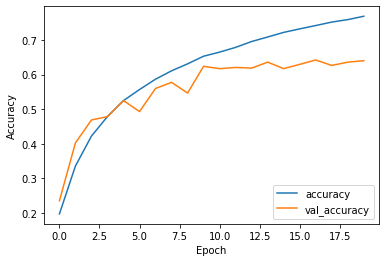

In [22]:
# Write your code here ----------

# -------------------------------
model2 = build_cnn_model(x_train[0].shape)
model2.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
# print(x_train[0].shape)
history = model2.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model2.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [23]:
print("It is clearly observable that the accuracy of fc model is very very low (10%) whereas that of cnn model is better(64%). moreover in the cnn model the number of paramiters are much lower than in fc model as number of dense layers decreases. so overall cnn model is quite good. \n")
print("one more thing that i observe is that increasing #epochs in cnn model from 10 to 20 leads to overfitting as is clearly visible in graph")

It is clearly observable that the accuracy of fc model is very very low (10%) whereas that of cnn model is better(64%). moreover in the cnn model the number of paramiters are much lower than in fc model as number of dense layers decreases. so overall cnn model is quite good. 

one more thing that i observe is that increasing #epochs in cnn model from 10 to 20 leads to overfitting as is clearly visible in graph
